# Query: is software citation exponentially growing, or is it DOI adoption?

Software citation has recently been shown to be on the increase in DataCite. [Fenner, 2018](https://doi.org/10.5438/1nmy-9902). This has been attributed to github packaging integration and FORCE11 recommendations for software citation. Zenodo was described as the largest contributor of software resource type.

[Zenodo](https://zenodo.org) also has a number of scientific packages with different resource types. Do other resource types show the exponential increases in citation that software is experiencing? 

We can use the DataCite [API](https://api.datacite.org/) to investigate citation rates for specific resource types. 

Here are the total counts of the resource types in Zenodo. The only DataCite resource type not used is collection. Software is the fourth most common type.

In [146]:
import requests
r = requests.get("https://api.datacite.org/works?data-center-id=cern.zenodo&page[size]=1")
if r.status_code == 200:
    data = r.json()

dataDict = data['meta']['resource-types']
dataDict
ResourceCountList = [d['count'] for d in dataDict]
ResourceTypeList = [d['id'] for d in dataDict]
CountTypes = list(zip(ResourceCountList,ResourceTypeList))
CountTypes

[(174824, 'text'),
 (156294, 'image'),
 (49397, 'dataset'),
 (46245, 'software'),
 (1424, 'other'),
 (1043, 'audiovisual'),
 (848, 'interactive-resource')]

Let's get the breakdown by year since that is the best resolution into doi registration that we can easily get with the DataCite API

In [147]:
import pandas as pd
def getResourceTypeCounts(ResourceType):
    #import requests
    Query = "https://api.datacite.org/works?data-center-id=cern.zenodo&resource-type-id="+ResourceType+"&page[size]=1"
    r = requests.get(Query)
    if r.status_code == 200:
        data = r.json()

    dataDict = data['meta']['registered']
    dataDict
    ResourceCountList = [d['count'] for d in dataDict]
    ResourceYearList = [d['id'] for d in dataDict]
    CombinedList = dict(zip(ResourceYearList,ResourceCountList))
    ResourceDict = {'ResourceType':ResourceType}
    
    CombinedList['ResourceType'] = ResourceType
    TotalList.append(CombinedList)
TotalList = []
for ResourceType in ResourceTypeList:
    getResourceTypeCounts(ResourceType)
df = pd.DataFrame(TotalList,columns=('2013','2014','2015','2016','2017','2018')).fillna(0)
df[['2013','2014','2015','2016','2017','2018']] = df[['2013','2014','2015','2016','2017','2018']].astype(int)
df.index = ResourceTypeList
df

,2013,2014,2015,2016,2017,2018
text,261,3206,17464,20586,61686,71621
image,4,20,89,50868,88236,17077
dataset,38,266,1430,1721,32332,13610
software,14,1803,3918,8801,22546,9163
other,0,0,0,0,240,1184
audiovisual,11,11,62,150,604,205
interactive-resource,0,0,49,76,338,385


It looks like the same story as software, but let's visualize it to make it more obvious.

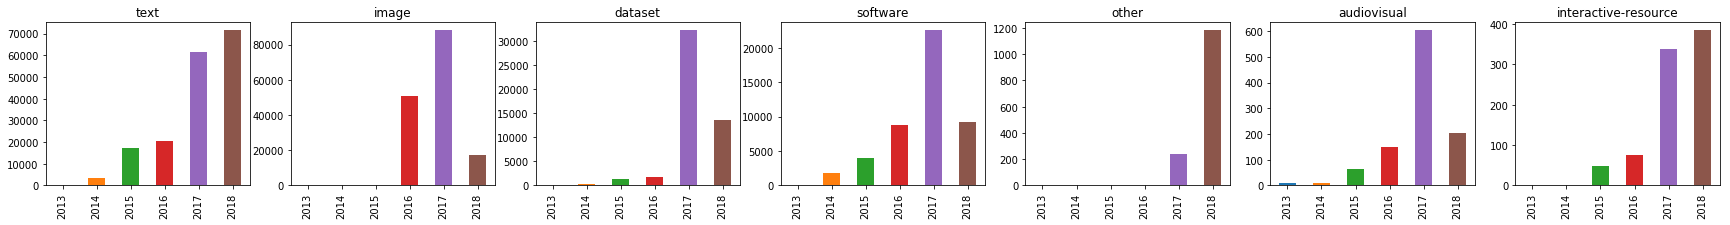

In [145]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=df.shape[0])
fig.set_figheight(3)
fig.set_figwidth(30)
for i in range(0, df.shape[0]):
    subset = df.iloc[i,:]
    subset.plot(kind='bar', ax=axes[i])
    axes[i].set_title(subset.name)

From the charts it looks like all kinds of resource types are growing, many faster than software, particularly when you take into account that in this query each version of a software is assigned a DOI and thus counted.

It may be valuable at this point to discover if the completeness of the FORCE11 software citation metadata concepts is increasing as a function of time. 

As we have already shown with DataCite, awareness drives adoption.

Now perhaps more interestingly, are software metadata records becoming more FORCE11 compliant as time goes on? 

[Completeness of Zenodo software metadata with respect to the FORCE11 software citation recommendation](../notebooks/Completeness%20of%20the%20FORCE11%20recommendation%20for%20software%20citation%20in%20Zenodo%20software%20metadata%20over%20time.ipynb)

In [149]:
 # create a list of 4-tuples to iterate over
 #    
def month_year_iter( start_month, start_year, end_month, end_year ):
    ym_start= 12*start_year + start_month - 1
    ym_end= 12*end_year + end_month - 1
    for ym in range( ym_start, ym_end ):
        y, m = divmod( ym, 12 )
        if m != 0:
            yield y, m, y, m+1
        

MonthRangeList=list(month_year_iter(1,2011,4,2018))
MonthRangeList

[(2011, 1, 2011, 2),
 (2011, 2, 2011, 3),
 (2011, 3, 2011, 4),
 (2011, 4, 2011, 5),
 (2011, 5, 2011, 6),
 (2011, 6, 2011, 7),
 (2011, 7, 2011, 8),
 (2011, 8, 2011, 9),
 (2011, 9, 2011, 10),
 (2011, 10, 2011, 11),
 (2011, 11, 2011, 12),
 (2012, 1, 2012, 2),
 (2012, 2, 2012, 3),
 (2012, 3, 2012, 4),
 (2012, 4, 2012, 5),
 (2012, 5, 2012, 6),
 (2012, 6, 2012, 7),
 (2012, 7, 2012, 8),
 (2012, 8, 2012, 9),
 (2012, 9, 2012, 10),
 (2012, 10, 2012, 11),
 (2012, 11, 2012, 12),
 (2013, 1, 2013, 2),
 (2013, 2, 2013, 3),
 (2013, 3, 2013, 4),
 (2013, 4, 2013, 5),
 (2013, 5, 2013, 6),
 (2013, 6, 2013, 7),
 (2013, 7, 2013, 8),
 (2013, 8, 2013, 9),
 (2013, 9, 2013, 10),
 (2013, 10, 2013, 11),
 (2013, 11, 2013, 12),
 (2014, 1, 2014, 2),
 (2014, 2, 2014, 3),
 (2014, 3, 2014, 4),
 (2014, 4, 2014, 5),
 (2014, 5, 2014, 6),
 (2014, 6, 2014, 7),
 (2014, 7, 2014, 8),
 (2014, 8, 2014, 9),
 (2014, 9, 2014, 10),
 (2014, 10, 2014, 11),
 (2014, 11, 2014, 12),
 (2015, 1, 2015, 2),
 (2015, 2, 2015, 3),
 (2015, 3, 201